In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn.svm import SVR
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import StackingRegressor
SEED = 4
import time
sns.set_style('ticks')

In [2]:
# I define two functions to easily concatenate and split training and test data as needed
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:1459], all_data.loc[1460:]


In [3]:
path = os.path.join(os.getcwd(), 'downloads')
df_test = pd.read_csv(os.path.join(path, 'test.csv'))
df_train = pd.read_csv(os.path.join(path, 'train.csv'))

df_all = concat_df(df_train, df_test).drop(columns = ['SalePrice', 'Id'])
id_val = df_train.Id
y_train = df_train.SalePrice

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Looking at missing value counts

for df in dfs:
    print(f'Count of missing values by feature in {df.name}')
    temp = df.isnull().sum()
    print(temp[temp!=0], '\n')

Count of missing values by feature in Training Set
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 

Count of missing values by feature in Test Set
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
Garag

Looks like there are a few features with almost 90% missing values, such as Alley, PoolQC, Fence and MiscFeature. I'll drop these features altogether. For numerical features with very few missing vals, I'll use median imputation, and for categorical features, I'll use the most frequently occuring value (mode).

In [9]:
# isolating null features
null_features = df_all.isnull().sum()

# For features having smaller than 100 missing values
null_100 = df_all.columns[list((null_features < 100) & (null_features > 0))]
num = df_all[null_100].select_dtypes(include = np.number).columns
non_num = df_all[null_100].select_dtypes(include = 'object').columns
# Numerical features
df_all[num] = df_all[num].apply(lambda x: x.fillna(x.median())) # median imputation
# Object features
df_all[non_num] = df_all[non_num].apply(lambda x: x.fillna(x.value_counts().index[0])) # mode imputation

# For features with larger than 1000 missing values
null_1000 = df_all.columns[list(null_features > 1000)]
df_all.drop(null_1000, axis=1, inplace=True)
df_all.drop(['GarageYrBlt', 'LotFrontage'], axis=1, inplace=True)


In [10]:
# for everything else, filling Null in missing values

df_all['GarageCond'] = df_all['GarageCond'].fillna('Null')
df_all['GarageFinish'] = df_all['GarageFinish'].fillna('Null')
df_all['GarageQual'] = df_all['GarageQual'].fillna('Null')
df_all['GarageType'] = df_all['GarageType'].fillna('Null')

In [11]:
# Update train & test dfs
df_train, df_test = divide_df(df_all)
df_train = pd.concat([df_train, y_train], axis=1)

Let's explore correlations between target and feature variables

In [12]:
df_train_corr = df_train.corrwith(df_train.SalePrice).sort_values(ascending=False)
df_train_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

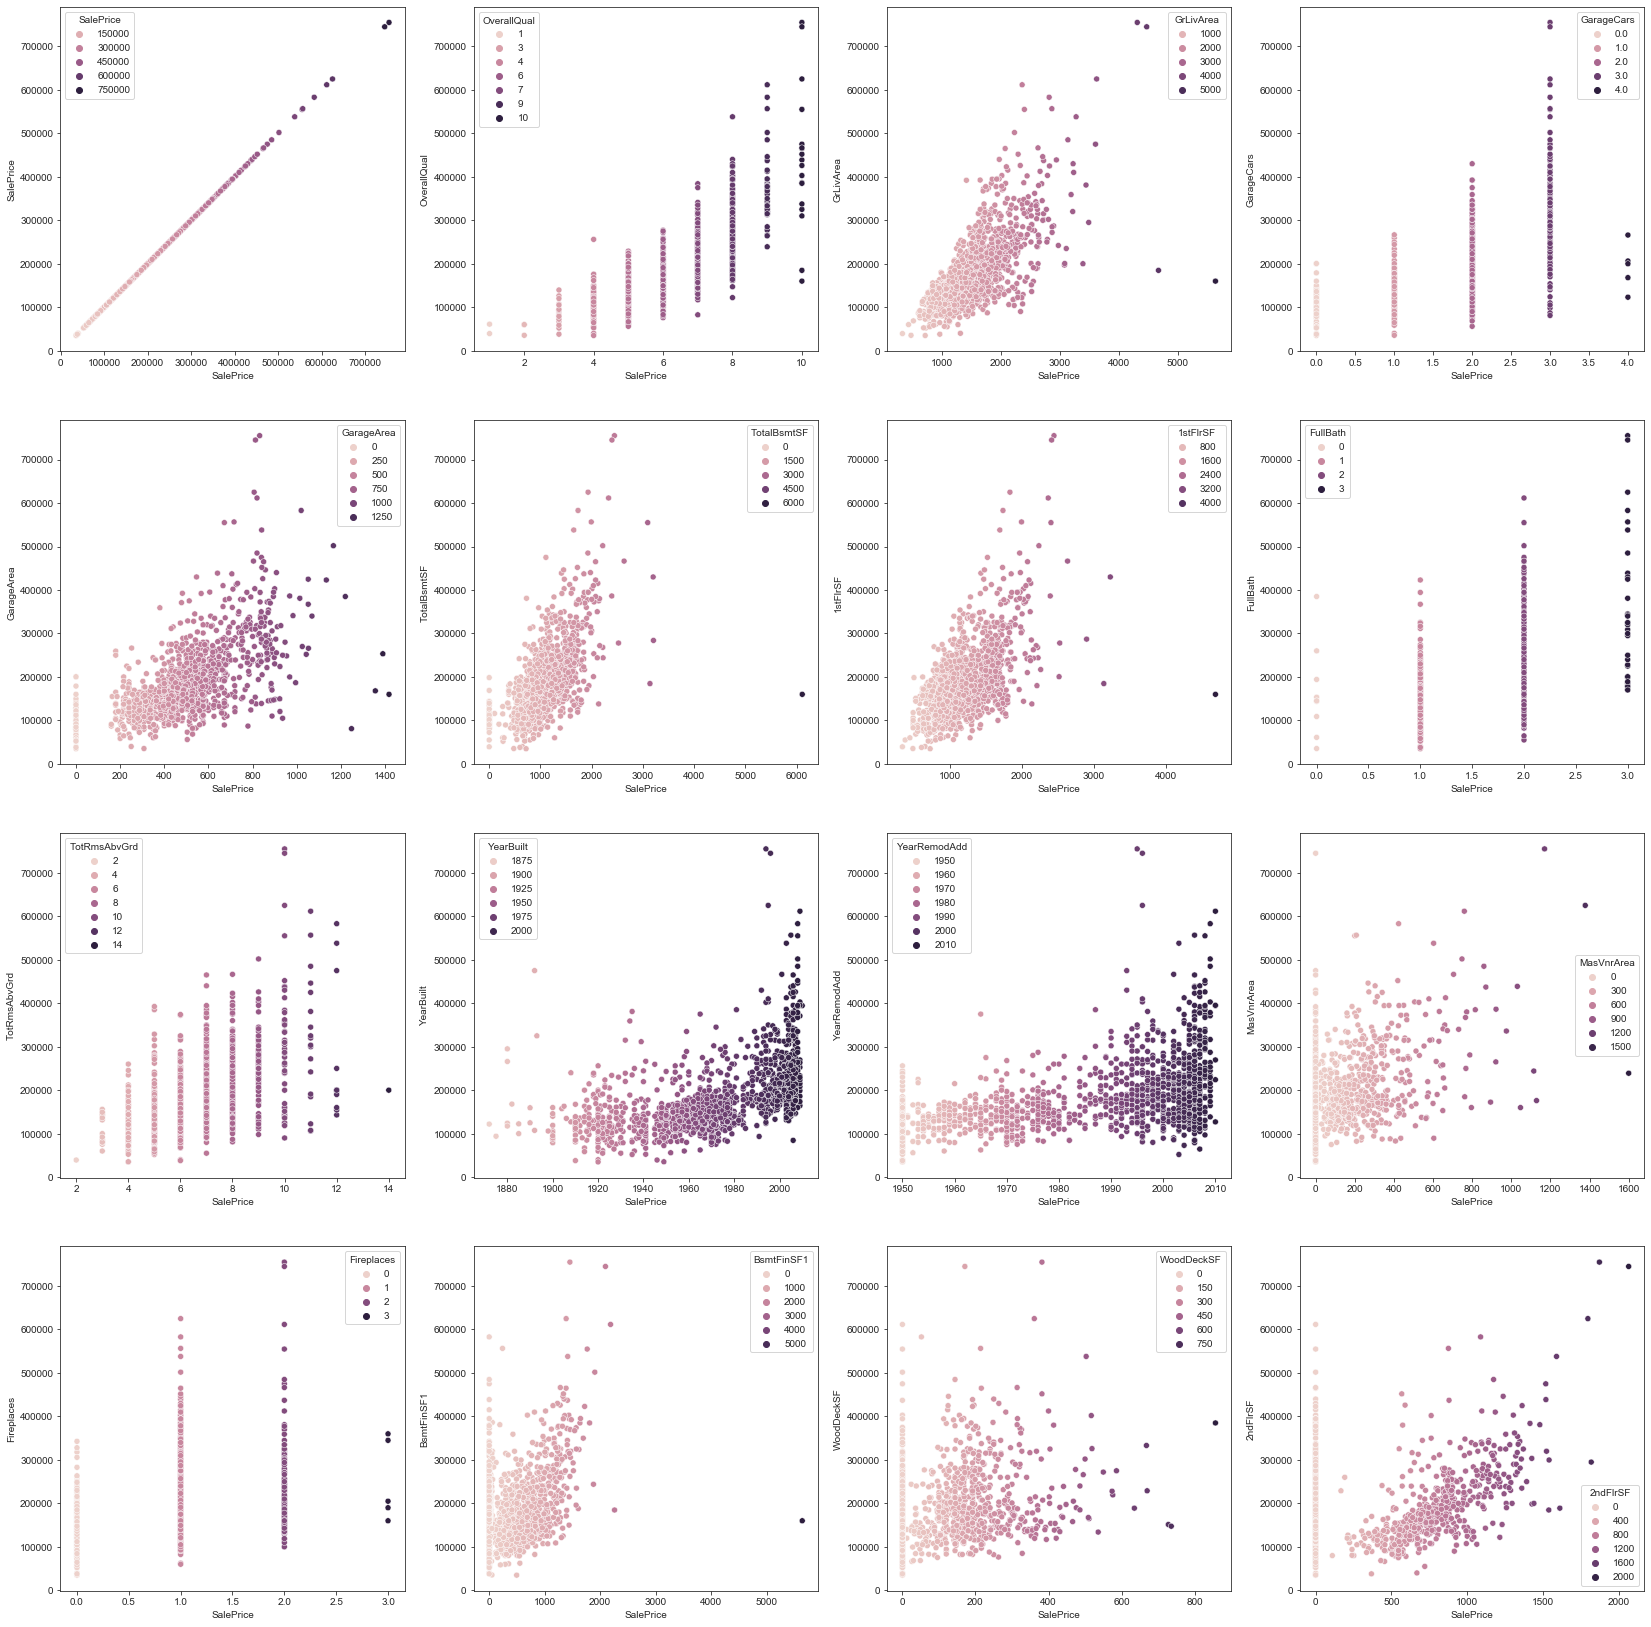

In [13]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
plt.subplots_adjust(right=1.5, top=1.5)
axs = axs.flatten()
for i, col in enumerate(list(df_train_corr.index[:16])): # using top 16 correlated numerical features
    sns.scatterplot(y='SalePrice', x=col, ax=axs[i], data=df_train, hue = col)
    axs[i].set_xlabel('SalePrice')
    axs[i].set_ylabel(col)
plt.show()

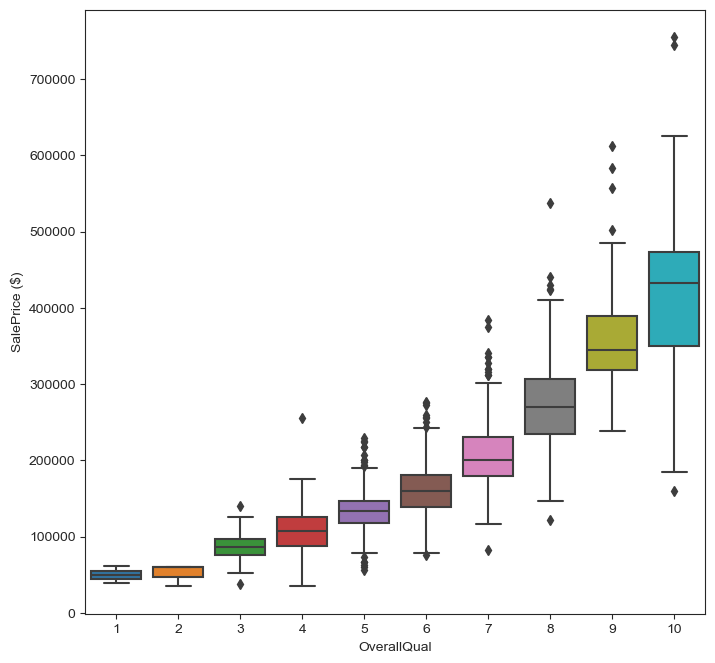

In [14]:
# Looking at correlation with some other features with high correlation:
sns.set_style(style='ticks')
fig = plt.figure(figsize=(8, 8))
ax = sns.boxplot(x ='OverallQual', y ='SalePrice', data = df_train)
ax.set_ylabel('SalePrice ($)')
ax.set_xlabel('OverallQual')
plt.gcf().set_dpi(100)
plt.show()

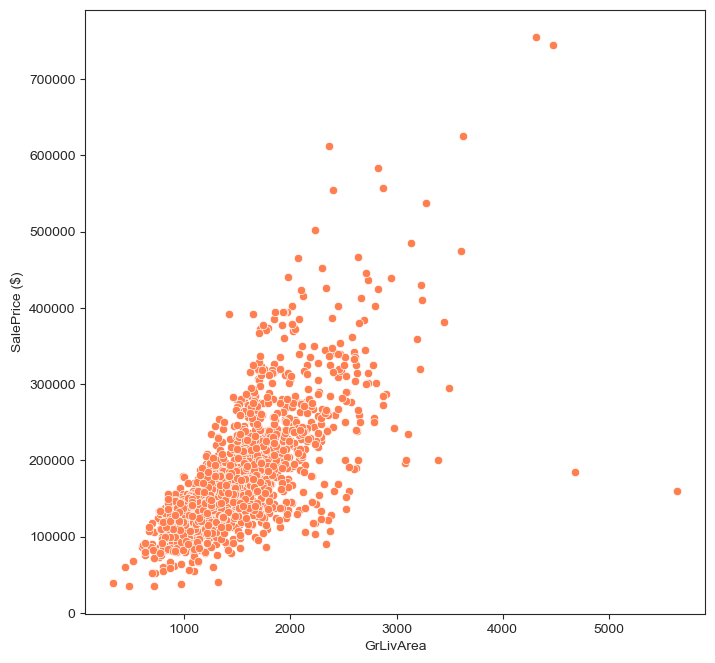

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x ='GrLivArea', y ='SalePrice', data = df_train, color = 'coral')
sns.color_palette("pastel")
ax.set_ylabel('SalePrice ($)')
# ax.set_xlabel('GrLivArea')
plt.gcf().set_dpi(100)
plt.show()

### Looking at categorical vars:

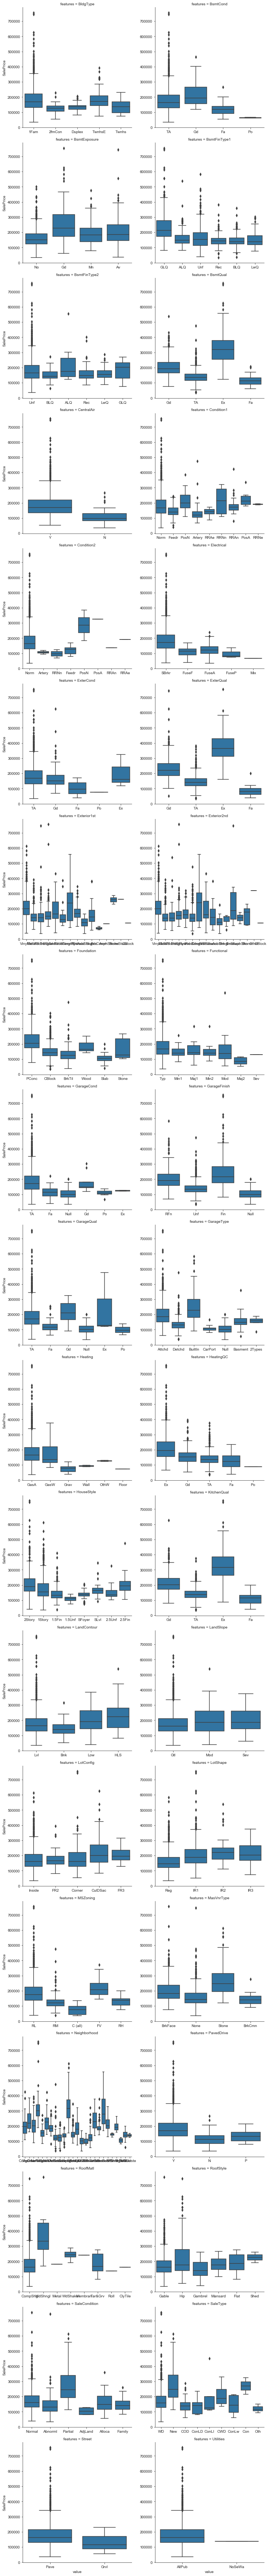

In [16]:
df_train_cate = df_train.select_dtypes(include=['object', 'category'])
data = pd.melt(pd.concat([df_train_cate, y_train], axis=1),
               id_vars=['SalePrice'], value_vars=df_train_cate.columns, var_name='features')
g = sns.FacetGrid(data, col='features', col_wrap=2, sharex=False, sharey=False, size=5)
g.map(sns.boxplot, 'value', 'SalePrice')

In [17]:
def make_kdeplot(feature) : 
    plt.rcParams['figure.figsize'] = (10, 10)
    sns.kdeplot(data[feature], shade=True)

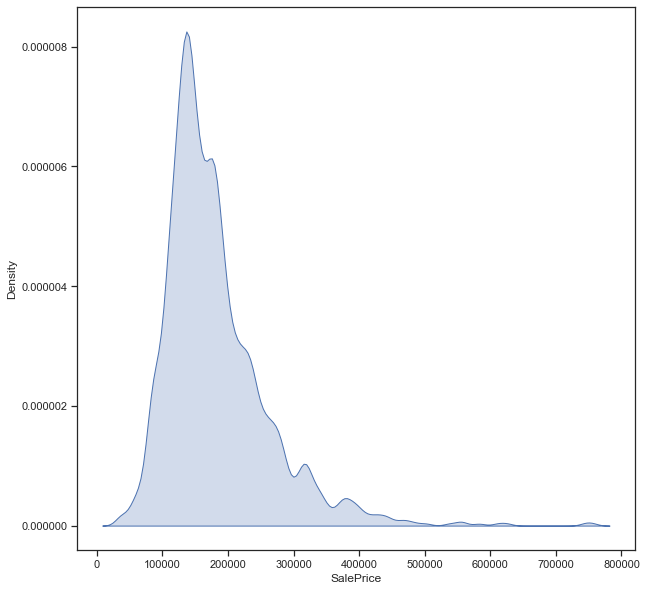

In [18]:
sns.set(style='ticks')
make_kdeplot('SalePrice')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

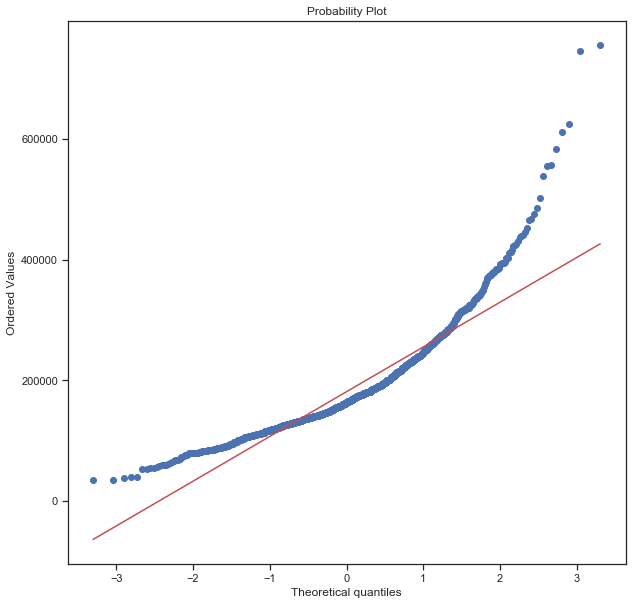

In [19]:
stats.probplot(y_train, dist='norm', plot=plt)

It looks like the saleprice data is left (positive) skewed (long right tail).

In [20]:
org_y_train = y_train
y_train = pd.Series(stats.boxcox(y_train, lmbda=0), name='SalePrice')

# I'll bin the year variables – Year Built, Year sold, and Year Remodelled
df_all['YearBuilt'] = pd.qcut(df_all['YearBuilt'], 10, duplicates='drop')
df_all['YearRemodAdd'] = pd.qcut(df_all['YearRemodAdd'], 10, duplicates='drop')
df_all['YrSold'] = pd.qcut(df_all['YrSold'], 10, duplicates='drop')

# Let's convert these back to numerical features
for cate_col in ['YearBuilt', 'YearRemodAdd', 'YrSold']:
    df_all[cate_col] = preprocessing.LabelEncoder().fit_transform(df_all[cate_col].values)
    
df_all['MSSubClass'] = df_all['MSSubClass'].astype(str)
df_all['OverallCond'] = df_all['OverallCond'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

### Feature Engineering

In [21]:
# # Imputation function

# def imputation(feature):
#     random_sample=data[feature].dropna().sample(data[feature].isnull().sum(), replace = True)               
#     random_sample.index=data[data[feature].isnull()].index
#     data.loc[data[feature].isnull(),feature]=random_sample
# # this takes a random sample from the data and uses this to replace missing vals for each feature

# for col in data:
#     imputation(col)

In [22]:
# new_null # sanity check for imputation

In [23]:

# Total square footage
df_all['TotalSF'] = df_all['BsmtFinSF1'] + df_all['BsmtFinSF2'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

# SF of porch in a house
df_all['TotalPorchSF'] = (df_all['OpenPorchSF'] + df_all['3SsnPorch'] +
                            df_all['EnclosedPorch'] + df_all['ScreenPorch'] + df_all['WoodDeckSF'])
# Number of bathrooms
df_all['TotalBath'] = (df_all['FullBath'] + (0.5 * df_all['HalfBath']) +
                               df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']))
# Basement bathrooms?!
df_all['TotalBsmtbath'] = df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath'])

# Flags
df_all['IsRemodel'] = df_all[['YearBuilt', 'YearRemodAdd']].apply(lambda x: 1 if x[0] != x[1] else 0, axis=1)
df_all['HasPool'] = df_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['Has2ndFloor'] = df_all['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['HasGarage'] = df_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['HasBsmt'] = df_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['HasFireplace'] = df_all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


drops = ['BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath', 'BsmtFullBath',
         'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF']
df_all.drop(drops, axis=1, inplace=True)

In [24]:
cate_features = list(df_all.select_dtypes(include=['object', 'category']).columns)
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = list(df_all.select_dtypes(include=numeric_dtypes).columns)
df_train, df_test = divide_df(df_all)

In [25]:
# check to see mismatched features in training and test sets

def forward_feature_selection(df_train, cate_features):

    # df input
    pre_ffs = pd.DataFrame(columns=cate_features)

    # Encode categorical features
    for cate_col in cate_features:
        pre_ffs[cate_col] = preprocessing.LabelEncoder().fit_transform(df_train[cate_col].values)
        
    # Step forward feature selection
    sfs1 = SFS(RandomForestRegressor(),
               k_features=2,
               forward=True,
               floating=False,
               verbose=2,
               scoring='r2',
               cv=3)
    
    sfs1 = sfs1.fit(np.array(pre_ffs[cate_features]), np.array(y_train))
    return sfs1

In [26]:
cate_features =  ['BldgType', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'CentralAir', 'Condition1', 
                  'Condition2', 'Electrical','ExterCond', 'ExterQual', 'Exterior2nd', 'Functional', 
                  'GarageCond', 'GarageType', 'Heating', 'HouseStyle', 'KitchenQual','LandContour', 
                  'LandSlope', 'LotShape', 'MSSubClass', 'Neighborhood', 'PavedDrive', 'RoofMatl', 
                  'RoofStyle','SaleCondition', 'SaleType', 'Street', 'Utilities']

In [27]:
cate_mismatch = []

for cate_col in cate_features:
    train_cate = df_train[cate_col].value_counts().index
    test_cate = df_test[cate_col].value_counts().index
    check_len = len(np.setdiff1d(train_cate, test_cate)) + len(np.setdiff1d(test_cate, train_cate))
    if check_len != 0:
        cate_mismatch.append(cate_col)
        
print('List of mismatched value features: \n', cate_mismatch)

List of mismatched value features: 
 ['Condition2', 'Electrical', 'Exterior2nd', 'Heating', 'HouseStyle', 'MSSubClass', 'RoofMatl', 'Utilities']


In [28]:
# Making necessary changes (replacing with modes)

df_train['Electrical'].loc[df_train['Electrical']=='Mix'] = 'SBrkr'
df_train['Exterior2nd'].loc[df_train['Exterior2nd']=='Other'] = 'VinylSd'
df_train['Heating'].loc[df_train['Heating']=='OthW'] = 'GasA'
df_train['Heating'].loc[df_train['Heating']=='Floor'] = 'GasA'
df_train['HouseStyle'].loc[df_train['HouseStyle']=='2.5Fin'] = '1.5Fin'
df_test['MSSubClass'].loc[df_test['MSSubClass']=='150'] = '160'
tt = [True if ((val=='RRNn') | (val=='RRAn') | (val=='RRAe')) else False
        for val in df_train['Condition2']]
df_train['Condition2'].loc[tt] = 'Norm'
cate_drop = ['Utilities', 'RoofMatl'] # dropping these two features
df_train.drop(cate_drop, axis=1, inplace=True)
df_test.drop(cate_drop, axis=1, inplace=True)
cate_features = [col for col in cate_features if col not in cate_drop]

In [29]:
pearson = dict()
for col in num_features:
    pear_val = stats.pearsonr(np.array(df_train[col]), np.array(y_train))[0]
    pearson[col] = pear_val
    
pearson = pd.Series(pearson).abs().sort_values(ascending=False)
# Choose only feature having correlation larger than 0.2
num_features = list(pearson.loc[pearson > 0.2].index) # try 0.25
num_features


['OverallQual',
 'GrLivArea',
 'TotalSF',
 'GarageCars',
 'TotalBath',
 'GarageArea',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'HasFireplace',
 'Fireplaces',
 'MasVnrArea',
 'TotalPorchSF',
 'HasGarage',
 '2ndFlrSF',
 'LotArea',
 'TotalBsmtbath',
 'BsmtUnfSF',
 'BedroomAbvGr']

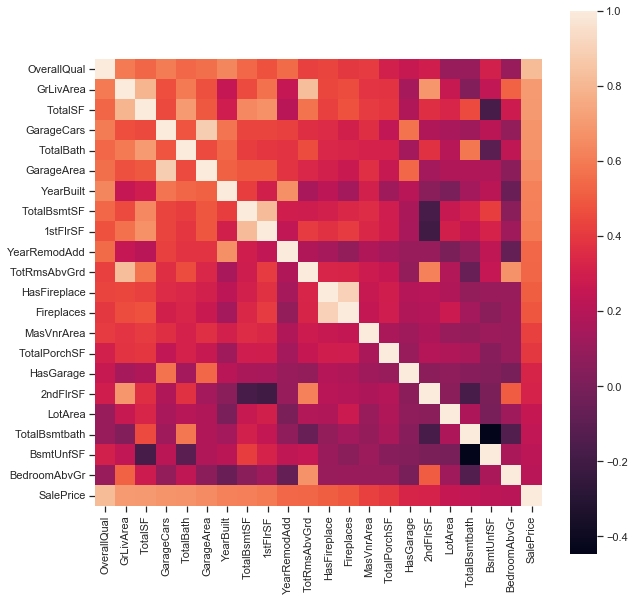

In [30]:
chosen_cols = num_features + cate_features

# Visualizing the correlation table
fig = plt.figure(figsize=(10, 10))
sns.heatmap(pd.concat([df_train[chosen_cols], y_train], axis=1).corr(), square=True,
            annot_kws={'size': 15})

In [31]:
df_train = df_train[chosen_cols]
df_test = df_test[chosen_cols]
df_all = concat_df(df_train, df_test)

In [32]:
# Apply Box cox for highly skewed features > 0.75 
# source: https://www.geeksforgeeks.org/box-cox-transformation-using-python/
skewed_features = df_all[num_features].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewed_features = skewed_features[abs(skewed_features) > 0.75]

for f in skewed_features.index:
    df_all[f] = np.log1p(df_all[f])
    
df_train, df_test = divide_df(df_all)

In [33]:
# Encode categorical features: one hot encoding and dropping originals

encoded_features = list()

for df in [df_train, df_test]:
    for feature in cate_features:
        encoded_feat = preprocessing.OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)
        
df_train = pd.concat([df_train, *encoded_features[:len(cate_features)]], axis=1)
df_test = pd.concat([df_test, *encoded_features[len(cate_features):]], axis=1)
df_train.drop(cate_features, axis=1, inplace=True)
df_test.drop(cate_features, axis=1, inplace=True)
df_all = concat_df(df_train, df_test)

In [34]:
### Sanity checks

In [35]:
df_train.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtUnfSF,Fireplaces,GarageArea,GarageCars,GrLivArea,HasFireplace,HasGarage,...,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleType_9,Street_1,Street_2
0,6.753438,6.751101,3,5.017280,0,548.0,2.0,7.444833,0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7.141245,0.000000,3,5.652489,1,460.0,2.0,7.141245,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,6.825460,6.765039,3,6.075346,1,608.0,2.0,7.488294,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,6.869014,6.629363,3,6.293419,1,642.0,3.0,7.448916,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,7.044033,6.960348,4,6.196444,1,836.0,3.0,7.695758,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,6.680855,6.340359,1,4.174387,0,480.0,2.0,7.217443,0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,7.435438,0.000000,3,5.762051,1,636.0,2.0,7.435438,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,7.010312,6.891626,3,5.379897,2,484.0,2.0,7.645398,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,6.930495,6.624065,2,6.859615,2,468.0,2.0,7.481556,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,6.982863,0.000000,2,4.948760,2,205.0,1.0,6.982863,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [36]:
df_test.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtUnfSF,Fireplaces,GarageArea,GarageCars,GrLivArea,HasFireplace,HasGarage,...,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleType_9,Street_1,Street_2
1460,6.799056,0.000000,2,5.602119,0,730.0,1.0,6.799056,0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1461,7.192934,0.000000,3,6.008813,0,312.0,1.0,7.192934,0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1462,6.834109,6.553933,3,4.927254,1,482.0,2.0,7.396335,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1463,6.831954,6.520621,3,5.783825,1,470.0,2.0,7.380879,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1464,7.155396,0.000000,2,6.925595,0,506.0,2.0,7.155396,0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1465,6.638568,6.794587,3,6.638568,1,440.0,2.0,7.412160,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1466,7.080026,0.000000,3,5.455321,0,420.0,2.0,7.080026,0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1467,6.672033,6.517671,3,6.672033,1,393.0,2.0,7.290293,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,7.201916,0.000000,2,6.498282,1,506.0,2.0,7.201916,1,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1469,6.783325,0.000000,2,0.000000,0,525.0,2.0,6.783325,0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [37]:
# Modeling!

kfolds = KFold(n_splits=10, shuffle=True, random_state=SEED)

# Return root mean square error of model prediction (Used for test prediction)
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Return root mean square error applied cross validation (Used for training prediction)
def evaluate_model_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)



In [38]:
# initialization
# !brew install libomp

def construct_models():
    alphas_ridge = [0.005, 0.01, 0.1, 1, 5, 10, 15]
    alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    e_alphas_elas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
    e_l1ratio_elas = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
    
    # Constructing the models
    models = dict()
    
    models['ridge'] = RidgeCV(alphas=alphas_ridge, cv=kfolds)
    models['lasso'] = LassoCV(alphas=alphas_lasso, random_state=SEED, cv=kfolds)
    models['elasticnet'] = ElasticNetCV(alphas=e_alphas_elas, cv=kfolds, l1_ratio=e_l1ratio_elas)
    models['svr'] = SVR(C = 20, epsilon = 0.008, gamma =0.0003)
    models['gbr'] = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, 
                                              max_depth=4, max_features='sqrt',
                                              min_samples_leaf=15, min_samples_split=10, 
                                              loss='huber',random_state =SEED) 
    models['lgbm'] = LGBMRegressor(objective='regression', num_leaves=4,
                                   learning_rate=0.01, n_estimators=5000,
                                   max_bin=200, bagging_fraction=0.75,
                                   bagging_freq=5, bagging_seed=7,
                                   feature_fraction=0.2,
                                   feature_fraction_seed=7, verbose=-1,
                                  colsample_bytree=None, subsample=None, subsample_freq=None)
    models['xgboost'] = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7, verbosity = 0,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=SEED, reg_alpha=0.00006)
    return models


models = construct_models()

In [39]:
def predict(selected_model):
    model=selected_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction) # r squared
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    

In [40]:
for name, model in models.items():
    start = time.perf_counter()
    
    model = model.fit(np.array(df_train), np.array(y_train))
    rmse_result = rmse(y_train, model.predict(np.array(df_train)))
    print(f'{name}\'s RMSE after training: {rmse_result}')
    run = time.perf_counter() - start
    print(f'Computational runtime: {round(run, 2)} secs\n')

ridge's RMSE after training: 0.11872304460054574
Computational runtime: 0.33 secs

lasso's RMSE after training: 0.11947077888387897
Computational runtime: 0.18 secs

elasticnet's RMSE after training: 0.1196826179314061
Computational runtime: 1.16 secs

svr's RMSE after training: 0.09852459645780211
Computational runtime: 1.35 secs

gbr's RMSE after training: 0.060305206050127014
Computational runtime: 9.02 secs

lgbm's RMSE after training: 0.08969168841978778
Computational runtime: 1.36 secs

xgboost's RMSE after training: 0.05865338796884863
Computational runtime: 12.01 secs



In [41]:
cv_rmse_result = dict()
cv_rmse_mean = dict()
cv_rmse_std = dict()

for name, model in models.items():
    start = time.perf_counter()
    
    cv_rmse_result[name] = evaluate_model_cv(model, np.array(df_train), np.array(y_train))
    cv_rmse_mean[name] = cv_rmse_result[name].mean()
    cv_rmse_std[name] = cv_rmse_result[name].std()
    print(f'Finish {name}\'s model')
    
    # Compute time for executing each algo
    run = time.perf_counter() - start
    print(f'Computational runtime: {round(run, 2)} secs\n')

Finish ridge's model
Computational runtime: 2.66 secs

Finish lasso's model
Computational runtime: 2.02 secs

Finish elasticnet's model
Computational runtime: 9.43 secs

Finish svr's model
Computational runtime: 7.48 secs

Finish gbr's model
Computational runtime: 77.99 secs

Finish lgbm's model
Computational runtime: 15.76 secs

Finish xgboost's model
Computational runtime: 94.99 secs



In [42]:
# Stacking

stack_model = StackingCVRegressor(regressors=(models['ridge'], 
                                              models['lasso'], 
                                              models['xgboost'],
                                              models['elasticnet'], 
                                              models['gbr'], 
                                              models['lgbm']),
                                              meta_regressor=models['xgboost'], 
                                              use_features_in_secondary=True)


start = time.perf_counter()

stack_model = stack_model.fit(np.array(df_train), np.array(y_train))
print('Finish training')
# Compute RMSE
rmse_stack = rmse(y_train, stack_model.predict(np.array(df_train)))
print(f'stack_model\'s RMSE (using cv) after training: {rmse_stack}')

run = time.perf_counter() - start
print(f'Computational runtime: {round(run, 2)} secs\n')

Finish training
stack_model's RMSE (using cv) after training: 0.05668092848687473
Computational runtime: 123.21 secs



In [45]:
# Blending 

# tweak weights to see performance differences

def blend_models_predict(X):
    return ((0.06 * models['ridge'].predict(np.array(X))) + \
            (0.07 * models['lasso'].predict(np.array(X))) + \
            (0.08 * models['elasticnet'].predict(np.array(X))) + \
            (0.13 * models['gbr'].predict(np.array(X))) + \
            (0.13 * models['lgbm'].predict(np.array(X))) + \
            (0.20 * models['xgboost'].predict(np.array(X))) + \
            (0.33 * stack_model.predict(np.array(X))))

print('RMSE on train data:')
print(rmse(y_train, blend_models_predict(np.array(df_train))))

RMSE on train data:
0.0686717191918647


In [46]:
# Submission

test = pd.read_csv(os.path.join(path, 'test.csv'))
test_id = test['Id']
submission = pd.concat((test_id, pd.Series(np.exp(blend_models_predict(df_test)), name='SalePrice')), axis=1)
submission.to_csv(os.path.join(path, 'Submission.csv'), index=False)